In [2]:
import requests
import pandas as pd
import json
from pandas import json_normalize

In [6]:
year = input('Temporada : ')
#driver = input('Driver :')
driver= 'max_verstappen'

Temporada : 2022


In [7]:
#http://ergast.com/api/f1/2022/drivers/alonso/results.json
url = "http://ergast.com/api/f1/"
query = "results.json"
urlquery = url + str(year) + '/drivers/'+driver+'/'+query
urlquery

'http://ergast.com/api/f1/2022/drivers/max_verstappen/results.json'

In [8]:
response = requests.get(urlquery)
data = response.json()
#print(json.dumps(data, indent=5))


In [9]:
drivers = data['MRData']['RaceTable']['Races']
#print(json.dumps(drivers, indent=5))



In [10]:
df = pd.DataFrame(drivers)
#print(df)

In [11]:
df2 = pd.json_normalize(drivers, "Results")
df2
   

,number,position,positionText,points,grid,laps,status,Driver.driverId,Driver.permanentNumber,Driver.code,...,Constructor.url,Constructor.name,Constructor.nationality,FastestLap.rank,FastestLap.lap,FastestLap.Time.time,FastestLap.AverageSpeed.units,FastestLap.AverageSpeed.speed,Time.millis,Time.time
0,1,19,19,0,2,54,Fuel pressure,max_verstappen,33,VER,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,Red Bull,Austrian,2,51,1:35.440,kph,204.140,NaN,NaN
1,1,1,1,25,4,50,Finished,max_verstappen,33,VER,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,Red Bull,Austrian,2,50,1:31.772,kph,242.191,5059293,1:24:19.293
2,1,18,R,0,2,38,Fuel leak,max_verstappen,33,VER,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,Red Bull,Austrian,6,37,1:21.677,kph,232.633,NaN,NaN
3,1,1,1,26,1,63,Finished,max_verstappen,33,VER,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,Red Bull,Austrian,1,55,1:18.446,kph,225.281,5527986,1:32:07.986
4,1,1,1,26,3,57,Finished,max_verstappen,33,VER,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,Red Bull,Austrian,1,54,1:31.361,kph,213.255,5664258,1:34:24.258
5,1,1,1,25,2,66,Finished,max_verstappen,33,VER,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,Red Bull,Austrian,4,46,1:25.456,kph,196.943,5840475,1:37:20.475
6,1,3,3,15,4,64,Finished,max_verstappen,33,VER,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,Red Bull,Austrian,5,47,1:16.052,kph,157.960,6991756,+1.491
7,1,1,1,25,3,51,Finished,max_verstappen,33,VER,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,Red Bull,Austrian,2,50,1:46.050,kph,203.779,5645941,1:34:05.941
8,1,1,1,25,1,70,Finished,max_verstappen,33,VER,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,Red Bull,Austrian,2,64,1:15.839,kph,207.012,5781757,1:36:21.757
9,1,7,7,6,2,52,Finished,max_verstappen,33,VER,...,http://en.wikipedia.org/wiki/Red_Bull_Racing,Red Bull,Austrian,8,44,1:32.354,kph,229.633,8289088,+18.777


In [12]:
results = df2[['position','points','grid']]
results

,position,points,grid
0,19,0,2
1,1,25,4
2,18,0,2
3,1,26,1
4,1,26,3
5,1,25,2
6,3,15,4
7,1,25,3
8,1,25,1
9,7,6,2


In [13]:
#http://ergast.com/api/f1/2022/drivers/alonso/results.json


In [16]:
results.dtypes

position    int64
points      int64
grid        int64
dtype: object

In [15]:
results['position'] = results['position'].astype(int)
results['points'] = results['points'].astype(int)
results['grid'] = results['grid'].astype(int)

/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_46650/1528687051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['position'] = results['position'].astype(int)
/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_46650/1528687051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['points'] = results['points'].astype(int)
/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_46650/1528687051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [17]:
round = []
for i  in range(1,17):
    round.append(i)
    
results['round'] = round

/var/folders/4g/fy11b71x7jsd5j1s4bztn7gm0000gn/T/ipykernel_46650/1626829777.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['round'] = round


In [18]:
results

,position,points,grid,round
0,19,0,2,1
1,1,25,4,2
2,18,0,2,3
3,1,26,1,4
4,1,26,3,5
5,1,25,2,6
6,3,15,4,7
7,1,25,3,8
8,1,25,1,9
9,7,6,2,10


In [19]:
import numpy as np
xi = np.array(results['round'])
yi = np.array(results['points'])
n  = len(xi)

In [87]:
yi[3] = yi[3] + 8
yi[10] = yi[10] + 8

In [88]:
yi

array([ 0, 25,  0, 34, 26, 25, 15, 25, 25,  6, 27, 25, 25, 26, 26, 25])

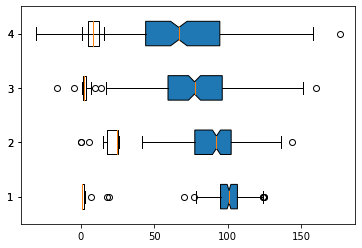

In [95]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

bp = ax.boxplot(data, patch_artist = True, 
                notch ='True', vert = 0) 

plt.boxplot(results, vert=0)
plt.show(bp)

In [21]:
#https://ergast.com/api/f1/2021/10/sprint
#https://ergast.com/api/f1/2021/drivers/bottas/sprint

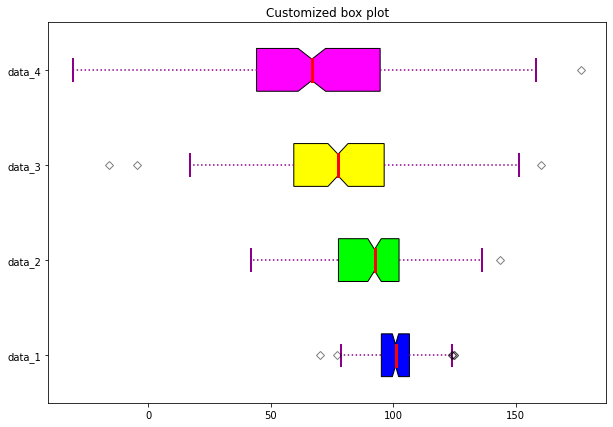

In [94]:
import matplotlib.pyplot as plt 
import numpy as np 
  
np.random.seed(10) 
data_1 = np.random.normal(100, 10, 200) 
data_2 = np.random.normal(90, 20, 200) 
data_3 = np.random.normal(80, 30, 200) 
data_4 = np.random.normal(70, 40, 200) 
data = [data_1, data_2, data_3, data_4] 
  
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_subplot(111) 
  
bp = ax.boxplot(data, patch_artist = True, 
                notch ='True', vert = 0) 
  
colors = ['#0000FF', '#00FF00',  
          '#FFFF00', '#FF00FF'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
  
for whisker in bp['whiskers']: 
    whisker.set(color ='#8B008B', 
                linewidth = 1.5, 
                linestyle =":") 
  
for cap in bp['caps']: 
    cap.set(color ='#8B008B', 
            linewidth = 2) 
  
for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 3) 
  
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='#e7298a', 
              alpha = 0.5) 
      
ax.set_yticklabels(['data_1', 'data_2',  
                    'data_3', 'data_4']) 
  
plt.title("Customized box plot") 
  
ax.get_xaxis().tick_bottom() 
ax.get_yaxis().tick_left() 
      
plt.show(bp) 

In [22]:
#http://ergast.com/api/f1/2022/drivers/alonso/results.json
url = "http://ergast.com/api/f1/"
query = "sprint.json"
urlquery = url + str(year) + '/drivers/'+driver+'/'+query
urlquery

'http://ergast.com/api/f1/2022/drivers/max_verstappen/sprint.json'

In [63]:
response = requests.get(urlquery)
data = response.json()
data
#print(json.dumps(data, indent=6))

{'MRData': {'xmlns': 'http://ergast.com/mrd/1.5',
  'series': 'f1',
  'url': 'http://ergast.com/api/f1/2022/drivers/max_verstappen/sprint.json',
  'limit': '30',
  'offset': '0',
  'total': '2',
  'RaceTable': {'season': '2022',
   'driverId': 'max_verstappen',
   'Races': [{'season': '2022',
     'round': '4',
     'url': 'http://en.wikipedia.org/wiki/2022_Emilia_Romagna_Grand_Prix',
     'raceName': 'Emilia Romagna Grand Prix',
     'Circuit': {'circuitId': 'imola',
      'url': 'http://en.wikipedia.org/wiki/Autodromo_Enzo_e_Dino_Ferrari',
      'circuitName': 'Autodromo Enzo e Dino Ferrari',
      'Location': {'lat': '44.3439',
       'long': '11.7167',
       'locality': 'Imola',
       'country': 'Italy'}},
     'date': '2022-04-24',
     'time': '13:00:00Z',
     'SprintResults': [{'number': '1',
       'position': '1',
       'positionText': '1',
       'points': '8',
       'Driver': {'driverId': 'max_verstappen',
        'permanentNumber': '33',
        'code': 'VER',
        

In [85]:
drivers = data['MRData']['RaceTable']['Races'][0]['SprintResults']
drivers
#print(json.dumps(drivers, indent=5))

[{'number': '1',
  'position': '1',
  'positionText': '1',
  'points': '8',
  'Driver': {'driverId': 'max_verstappen',
   'permanentNumber': '33',
   'code': 'VER',
   'url': 'http://en.wikipedia.org/wiki/Max_Verstappen',
   'givenName': 'Max',
   'familyName': 'Verstappen',
   'dateOfBirth': '1997-09-30',
   'nationality': 'Dutch'},
  'Constructor': {'constructorId': 'red_bull',
   'url': 'http://en.wikipedia.org/wiki/Red_Bull_Racing',
   'name': 'Red Bull',
   'nationality': 'Austrian'},
  'grid': '1',
  'laps': '21',
  'status': 'Finished',
  'Time': {'millis': '1839567', 'time': '30:39.567'},
  'FastestLap': {'lap': '14', 'Time': {'time': '1:19.154'}}}]

In [83]:
df = pd.DataFrame(drivers)
df

,number,position,positionText,points,Driver,Constructor,grid,laps,status,Time,FastestLap
0,1,1,1,8,"{'driverId': 'max_verstappen', 'permanentNumbe...","{'constructorId': 'red_bull', 'url': 'http://e...",1,21,Finished,"{'millis': '1839567', 'time': '30:39.567'}","{'lap': '14', 'Time': {'time': '1:19.154'}}"
